In [278]:
#Shock tube assignment. Code written by Shantanu Bailoor

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from JSAnimation.IPython_display import display_animation

#Define grid parameters
#Spatial grid
xmin = -10.0;
xmax = 10.0;
nx = 81;
x = np.linspace(xmin,xmax,nx);
dx = (xmax - xmin)/(nx-1);

#Temporal grid
Tmin = 0.0;
Tmax = 0.01;
sigma = 0.8
dt = 0.0002;

nt = int((Tmax-Tmin)/dt) + 1

#problem parameters
gam  = 1.4;
u    = np.zeros((nx,3));
unew = np.zeros((nx,3));
u0   = np.zeros((nx,3));
rhoplt = np.zeros((nt,nx));
rhouplt = np.zeros((nt,nx));
rhoeplt = np.zeros((nt,nx));

def init_u(u0):
    for i in range (nx):
        if (x[i] < 0.0):
            u0[i] = [1.0, 0.0, 100000.0/(gam-1.0)];
        else:
            u0[i] = [0.125, 0.0, 10000.0/(gam-1.0)];
            
#Compute flux vector
def computeF(uin):
    nel = len(uin)
    Fv = np.zeros((nel,3));
    #print(uin[nx-1]);
    for i in range (nel):
        rho =  uin[i][0];
        rhou = uin[i][1];
        rhoe = uin[i][2];

        rhou2 = rhou**2/rho;
        
        p = (gam-1)*(rhoe - 0.5*rhou2);

        #Define flux vector:
        Fv[i] = [rhou, (rhou2 + p), ((rhoe + p)*rhou/rho)];    
    return Fv;
            
#Richtmeyer time-stepping scheme
def Richtmeyer(u, nplt):
    unew = np.copy(u);
    usr  = np.zeros((nx,3));
    Fsr  = np.zeros((nx,3));
    
    F = computeF(u);
    
    for i in range (0,nx-1):
        usr[i] = 0.5*(np.array(u[i]) + np.array(u[i+1])) - \
        0.5*dt/dx*(np.array(F[i+1]) - np.array(F[i]));
            
    Fsr[:nx-1] = computeF(usr[:nx-1]);
    unew[1:-1] = u[1:-1] - dt/dx*(Fsr[1:-1]-Fsr[:-2]);
    u = np.copy(unew);
    rhoplt[nplt] = np.copy(unew[:,0]); 
    rhouplt[nplt] = np.copy(unew[:,1]); 
    rhoeplt[nplt] = np.copy(unew[:,2]); 
    return u

#Initialize the solution vector            
init_u(u0);
u = np.copy(u0);

computeF(u0);
#print(u0);
time = Tmin

#Start time marching
for n in range(nt):
    u = Richtmeyer(u, n);
    time = time + dt;
    if (time == 0.01):
        for i in range (nx):
            if x[i] == 2.5:
                print('velocity at x = 2.5 m:', u[i][1]/u[i][0], 'm/s');
                print('density at x = 2.5 m:', u[i][0], 'kg/m3');
                print('pressure at x = 2.5 m:', (gam-1)*(u[i][2] - 0.5*u[i][1]*u[i][1]/u[i][0]), 'N/m2');
                

velocity at x = 2.5 m: 292.611471527 m/s
density at x = 2.5 m: 0.374691402648 kg/m3
pressure at x = 2.5 m: 30250.8901676 N/m2


In [279]:
def animate(data):
    x = np.linspace(-10., 10., nx)
    y = data
    line.set_data(x,y)
    return line,


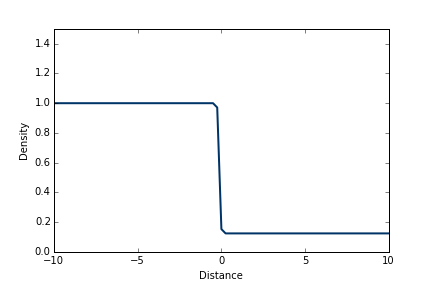
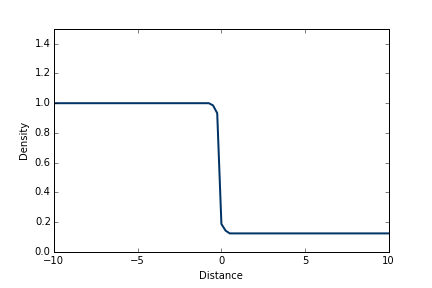
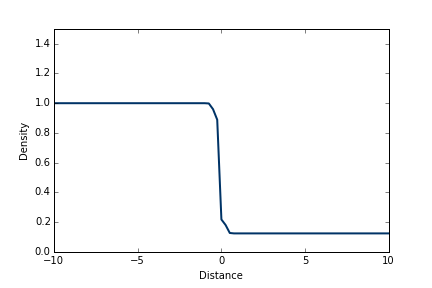
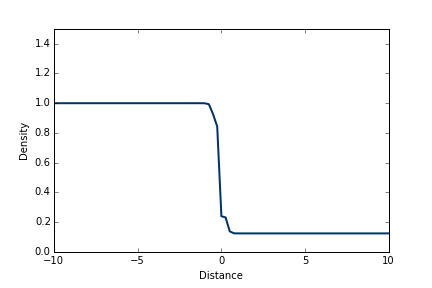
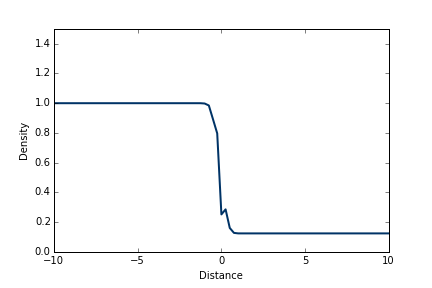
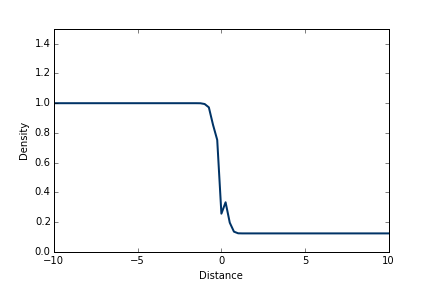
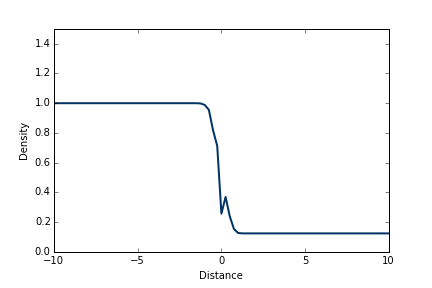
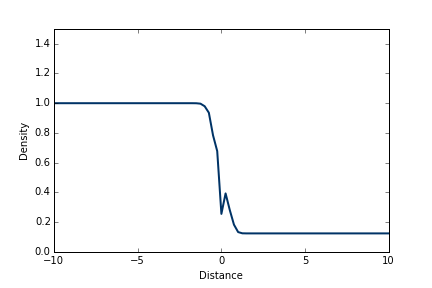
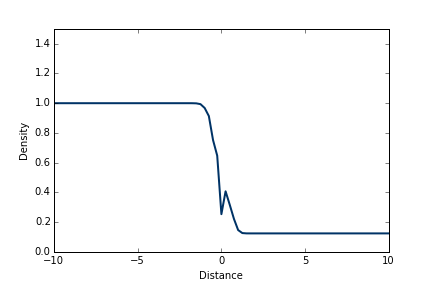
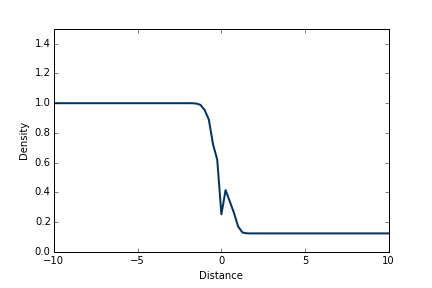
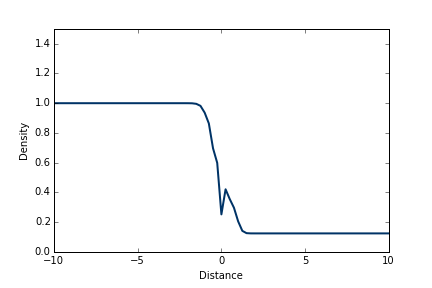
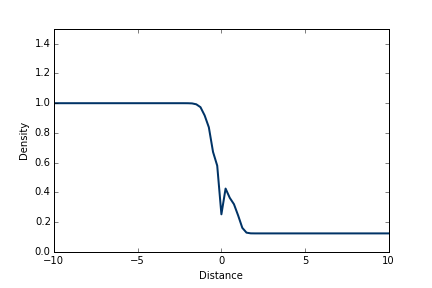
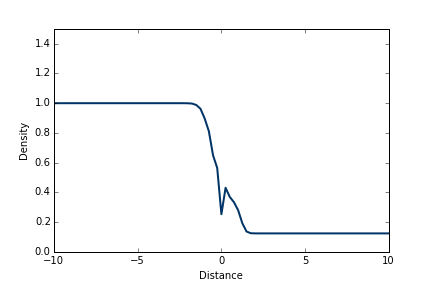
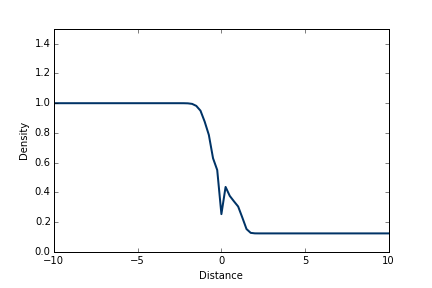
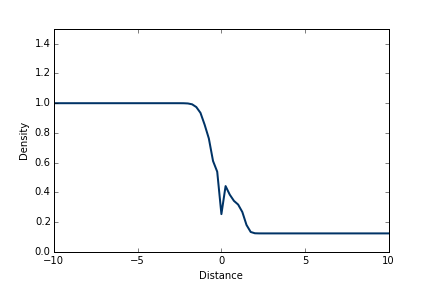
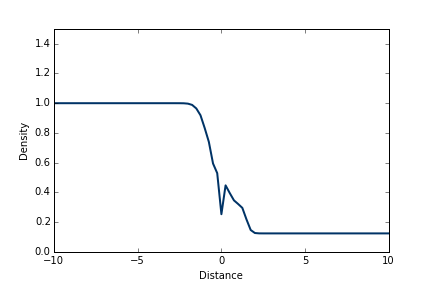
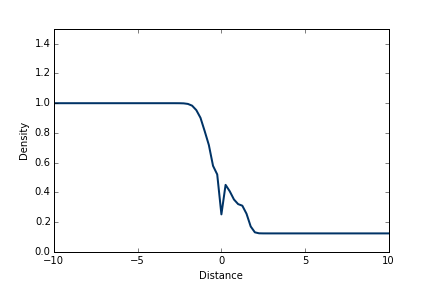
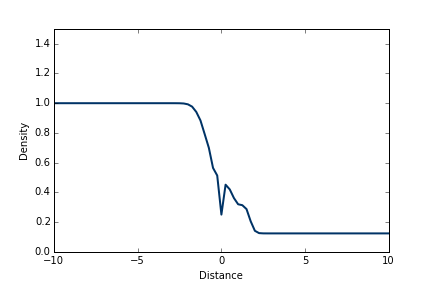
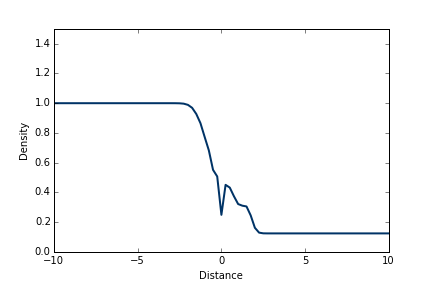
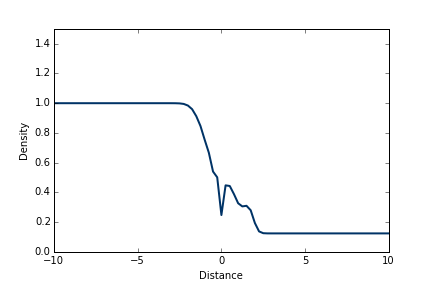
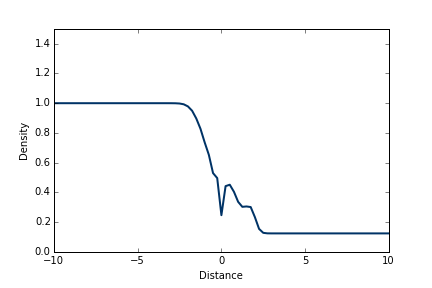
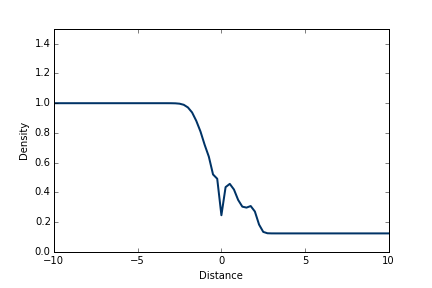
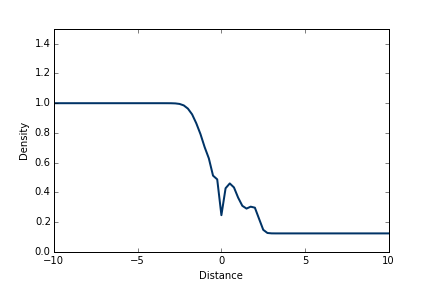
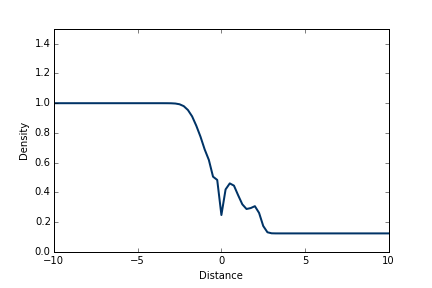
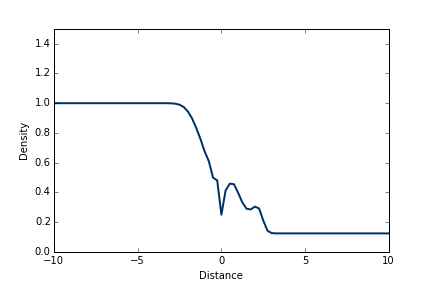
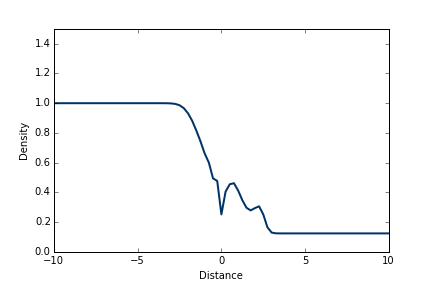
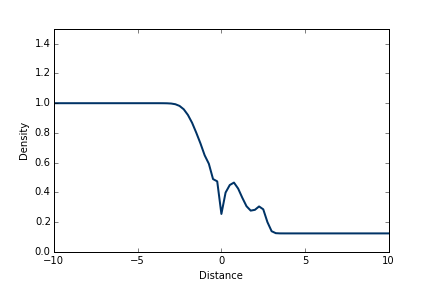
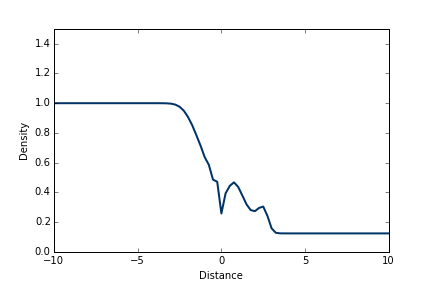
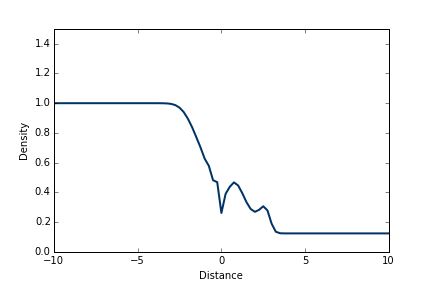
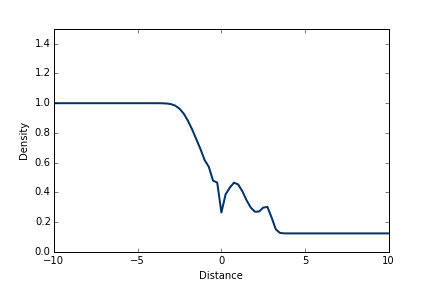
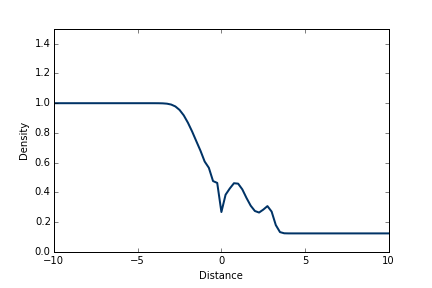
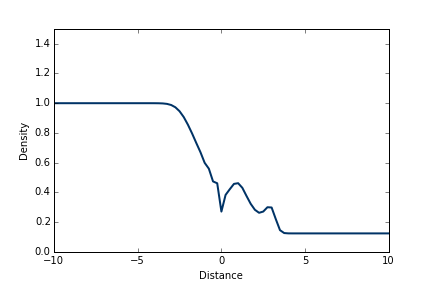
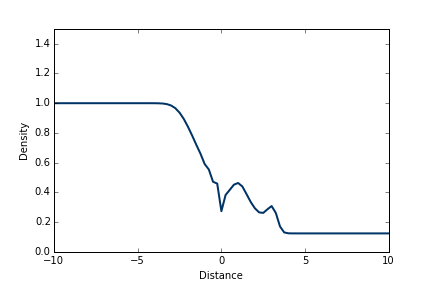
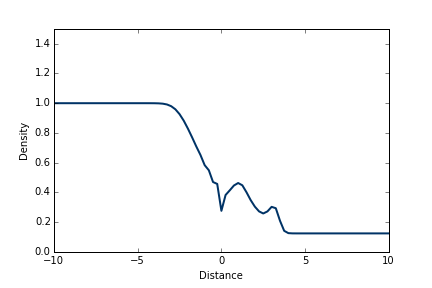
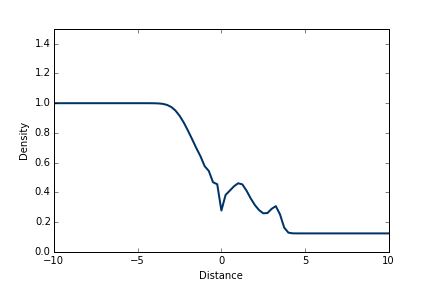
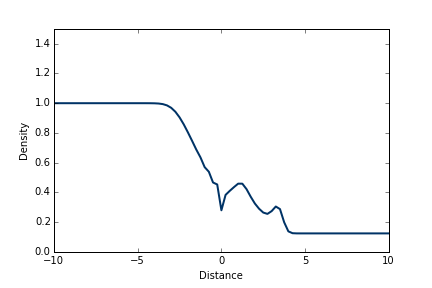
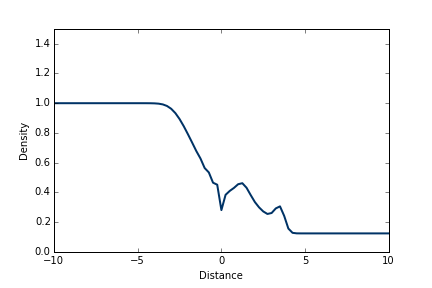
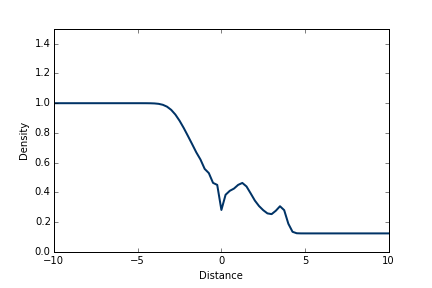
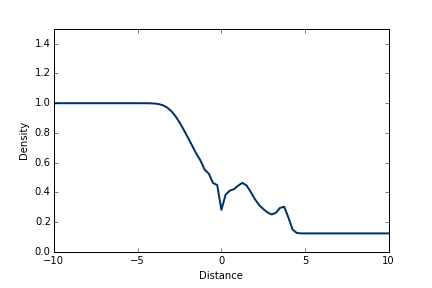
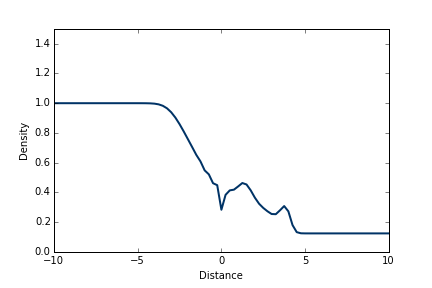
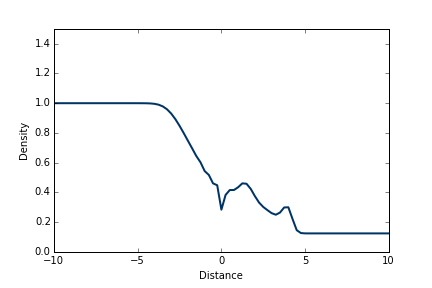
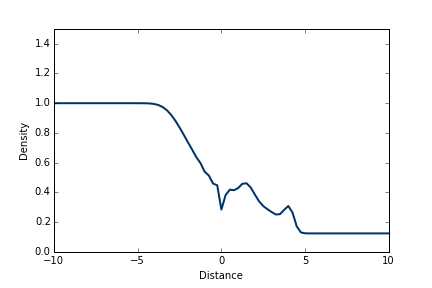
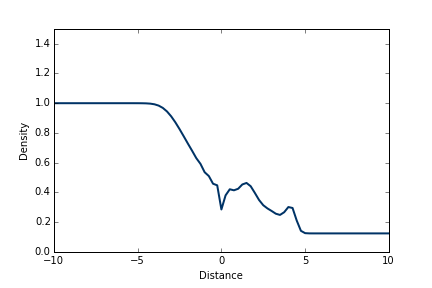
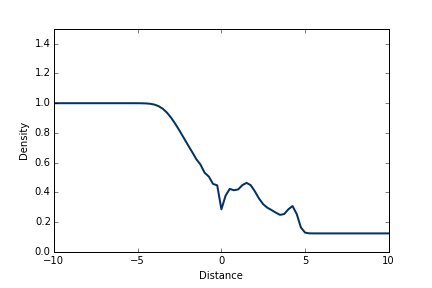
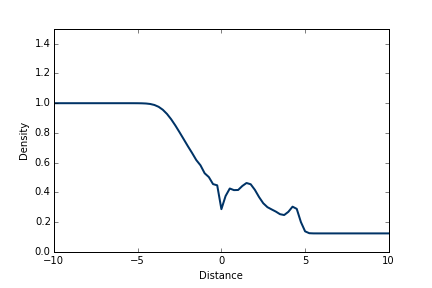
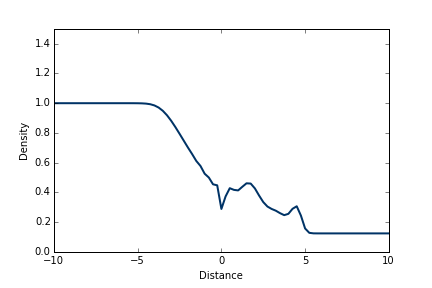
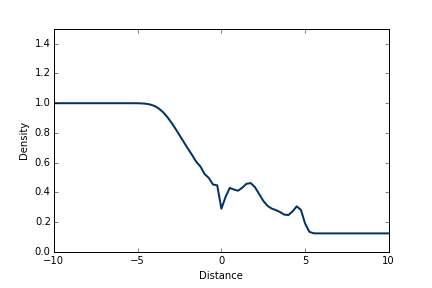
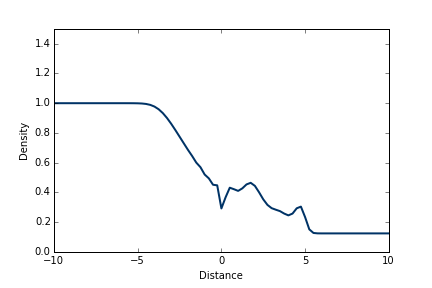
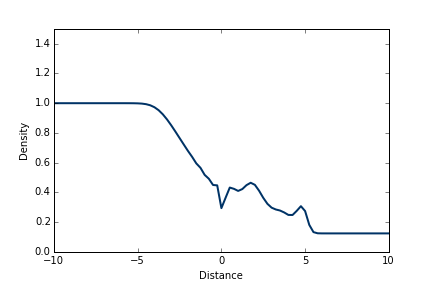
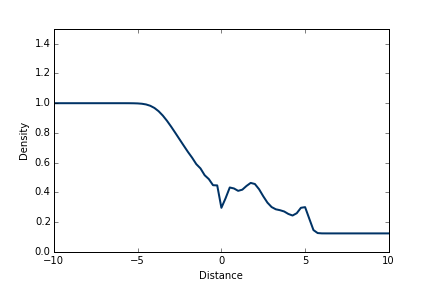
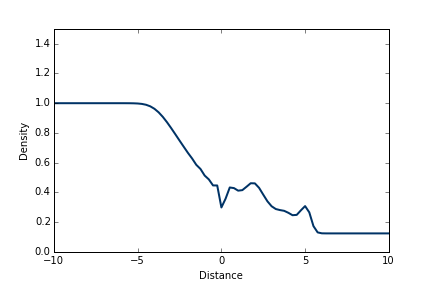

In [280]:
fig = plt.figure();
ax = plt.axes(xlim=(-10.,10.),ylim=(0,1.5),xlabel=('Distance'),ylabel=('Density'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rhoplt, interval=50)
display_animation(anim, default_mode='once')


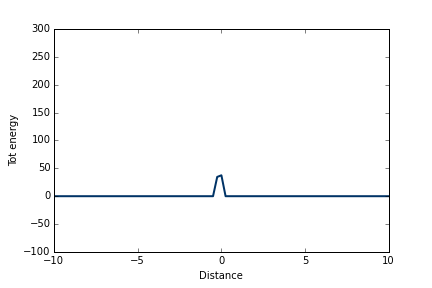
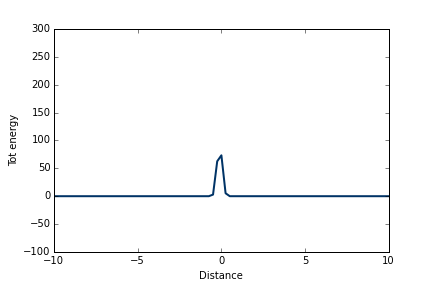
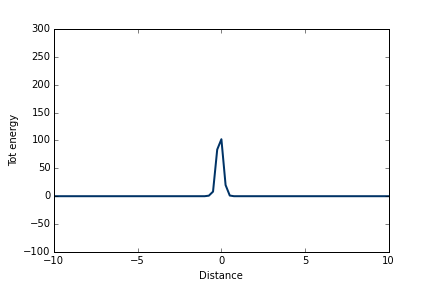
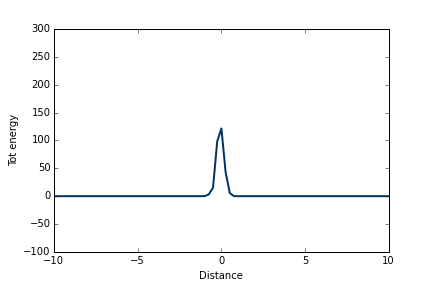
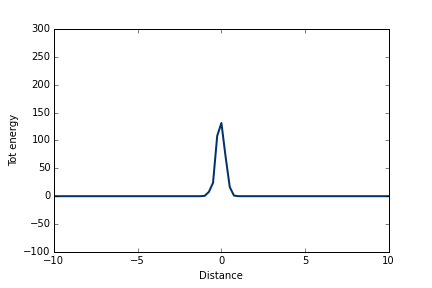
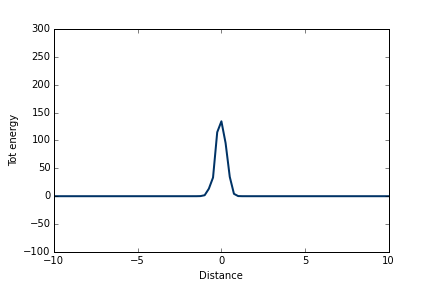
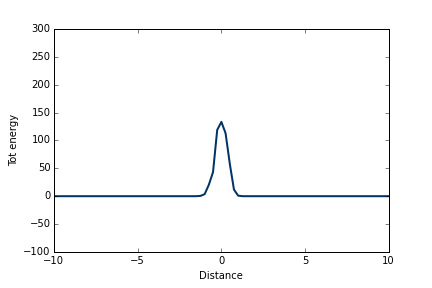
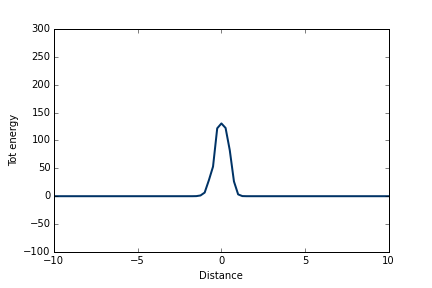
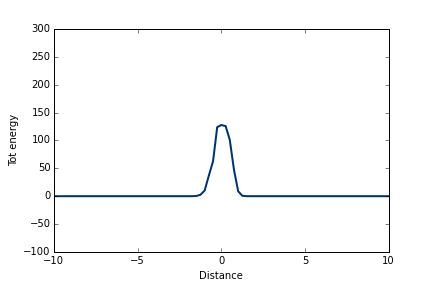
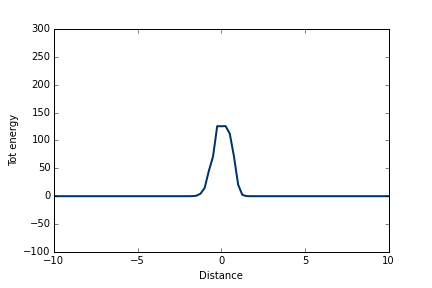
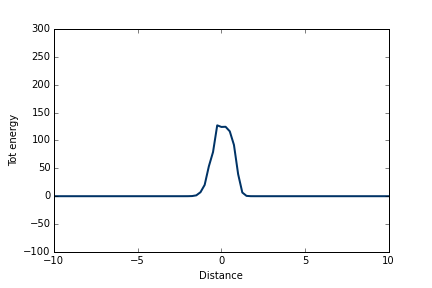
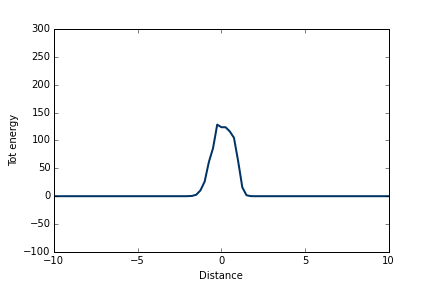
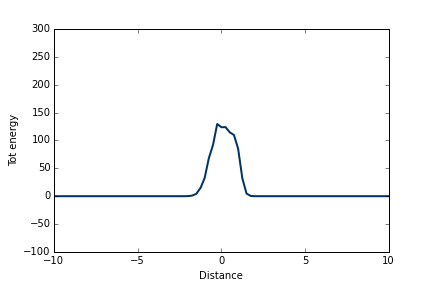
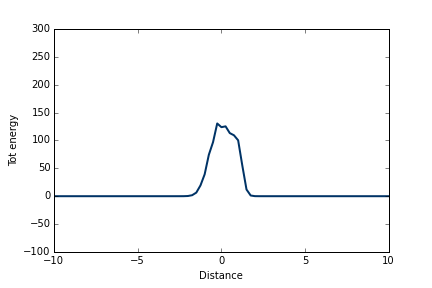
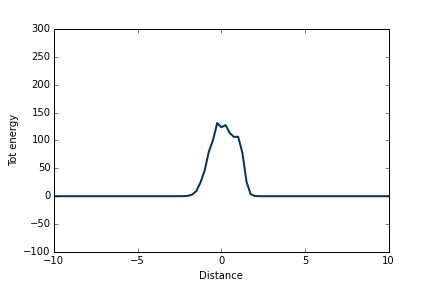
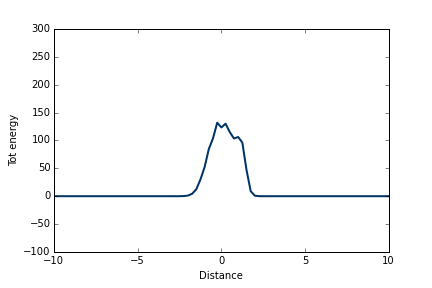
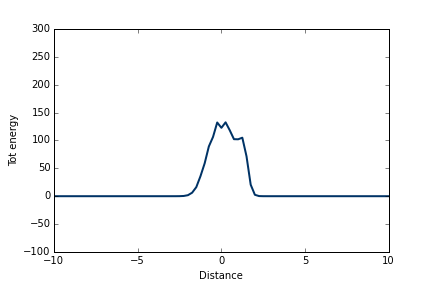
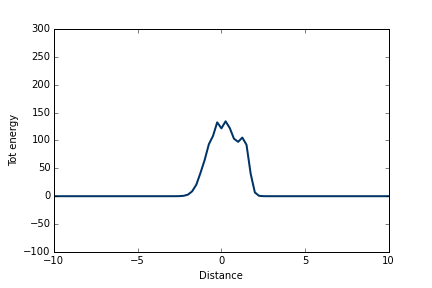
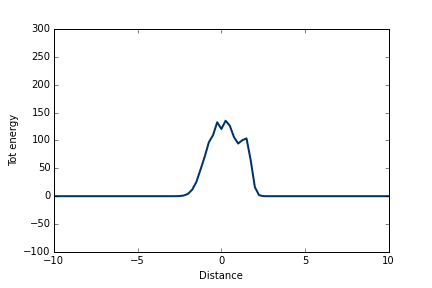
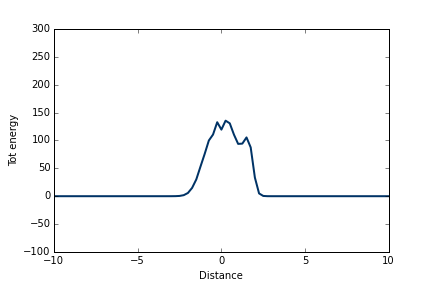
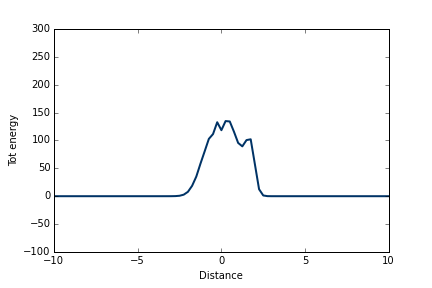
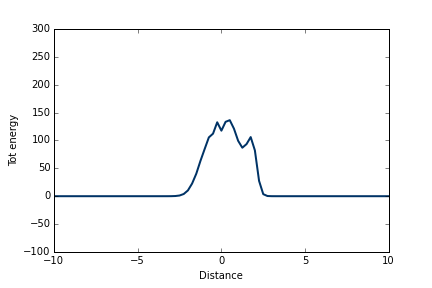
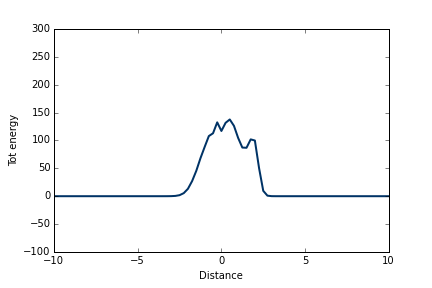
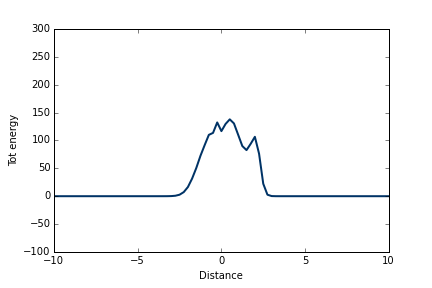
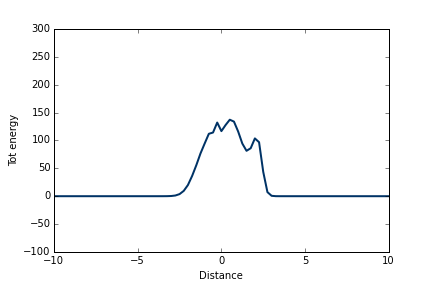
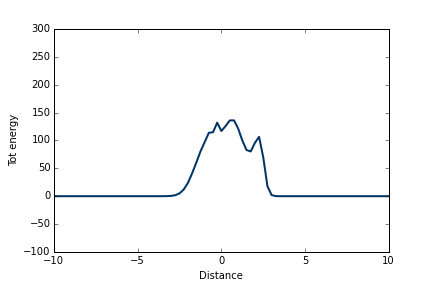
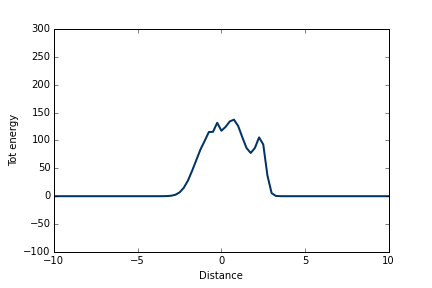
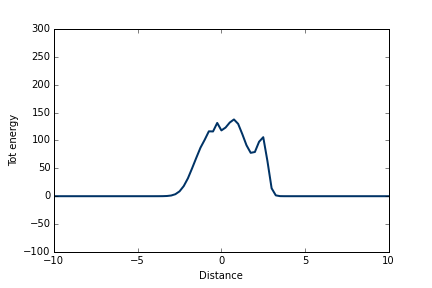
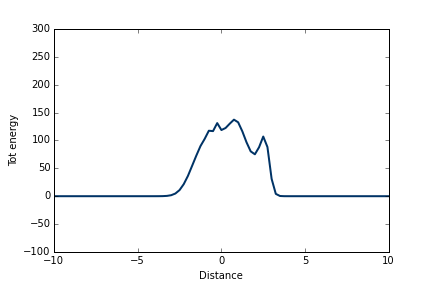
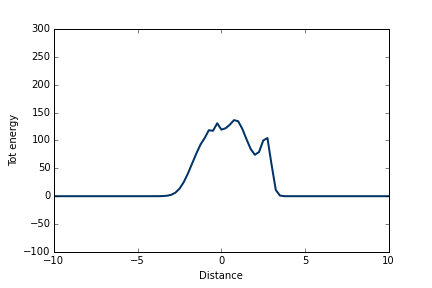
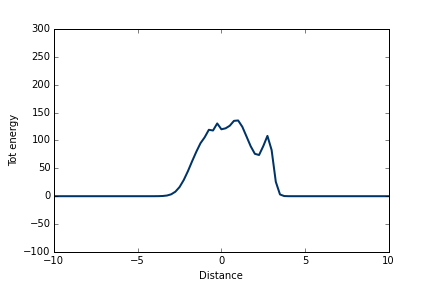
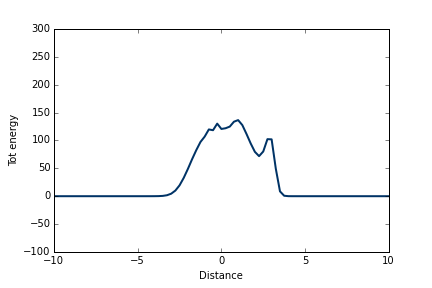
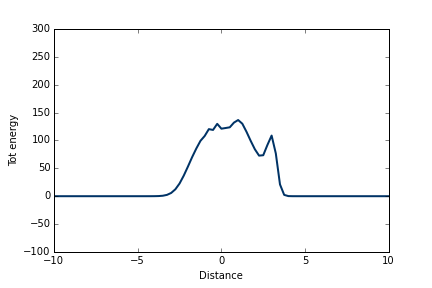
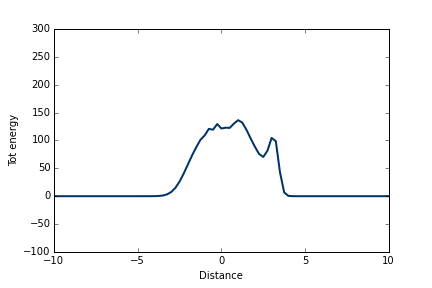
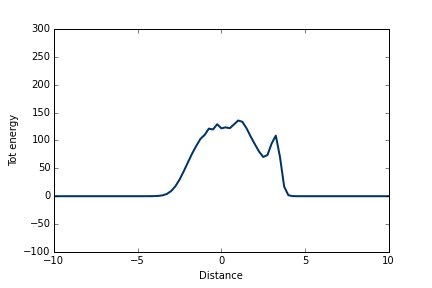
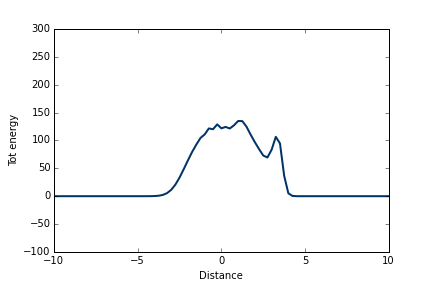
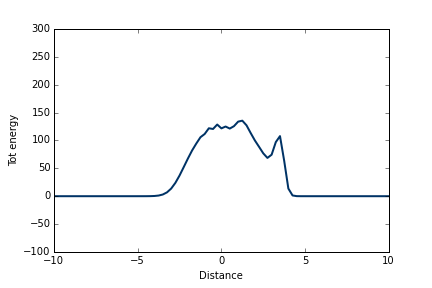
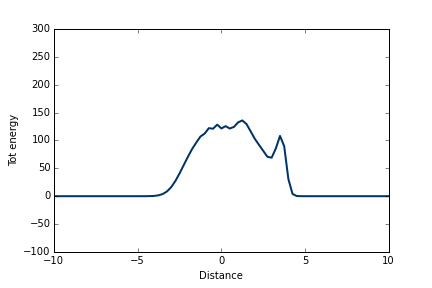
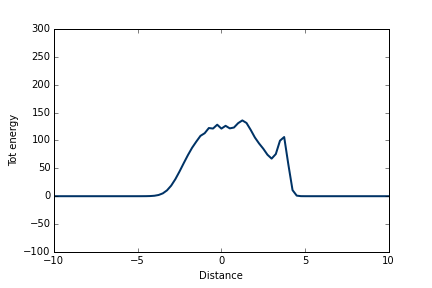
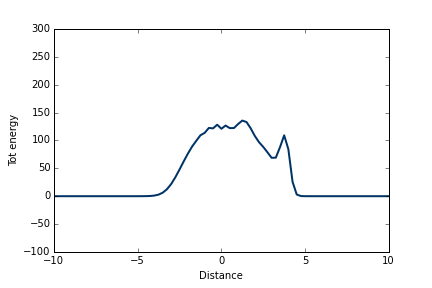
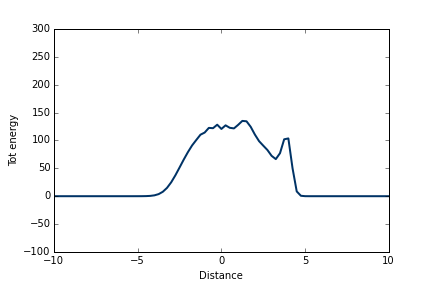
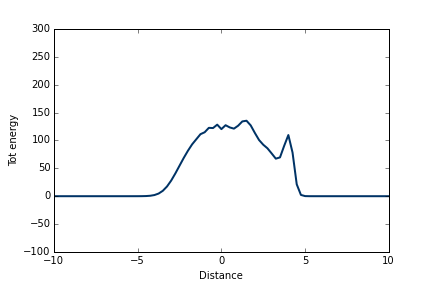
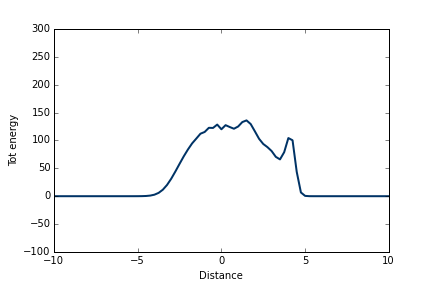
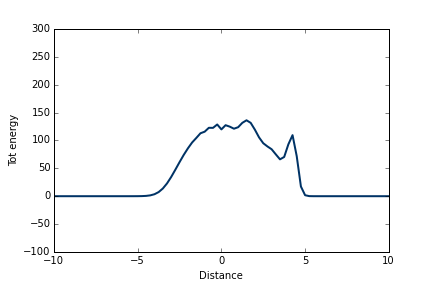
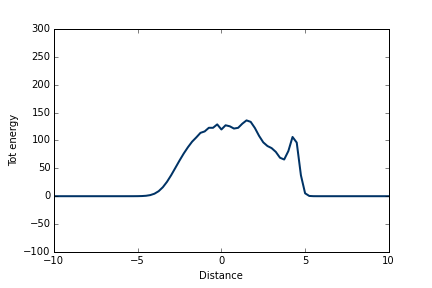
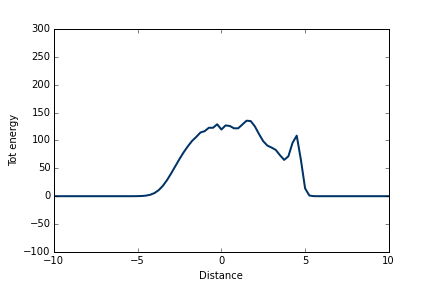
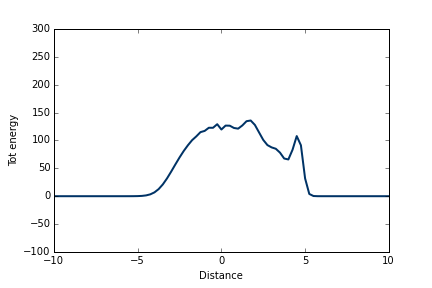
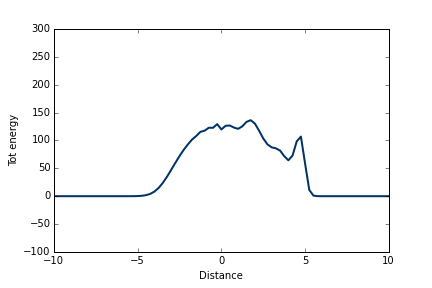
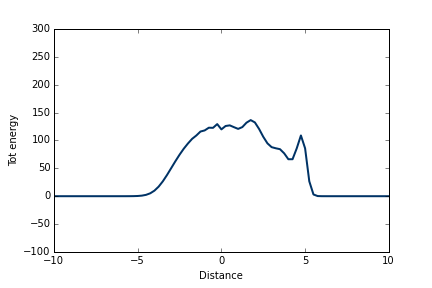
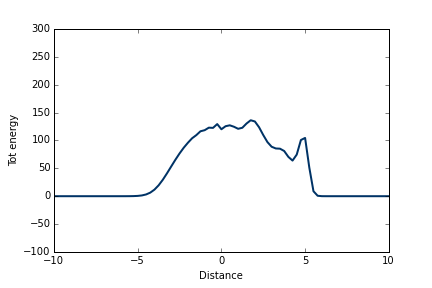
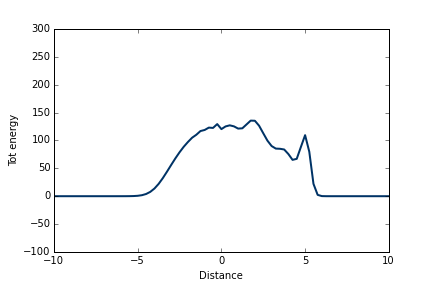

In [281]:
fig = plt.figure();
ax = plt.axes(xlim=(-10.,10.),ylim=(-100,300),xlabel=('Distance'),ylabel=('Tot energy'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rhouplt, interval=50)
display_animation(anim, default_mode='once')


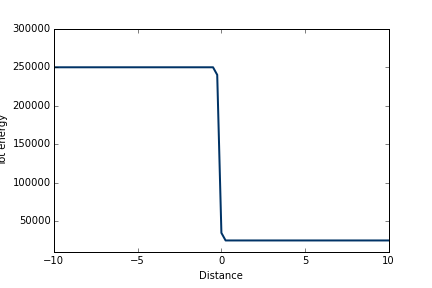
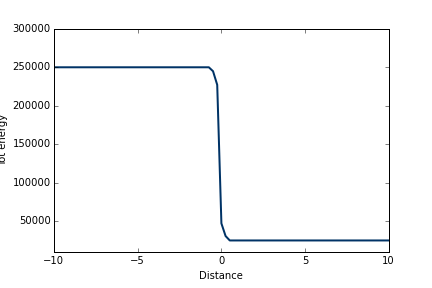
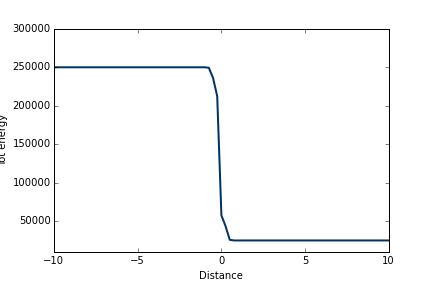
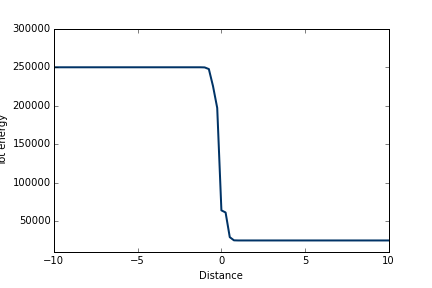
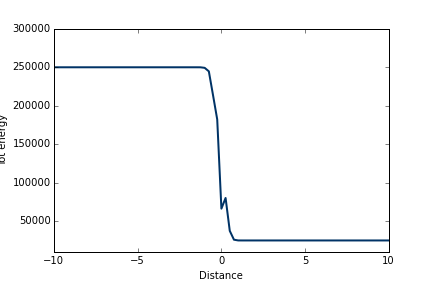
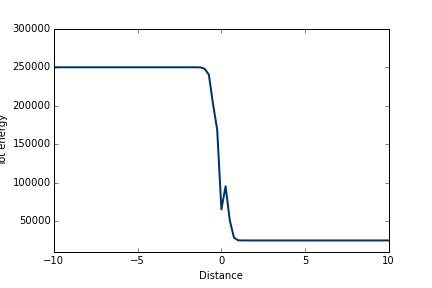
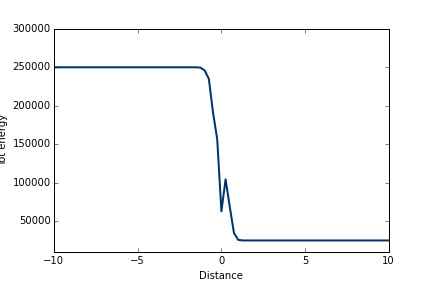
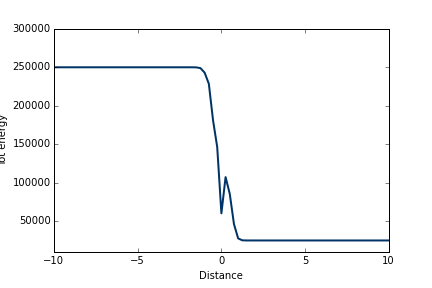
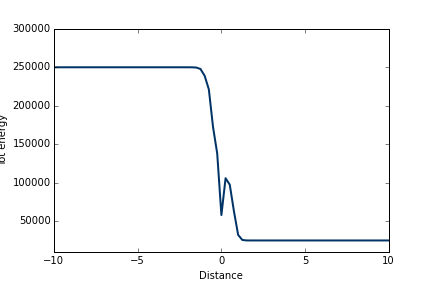
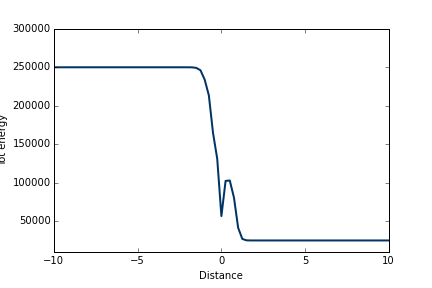
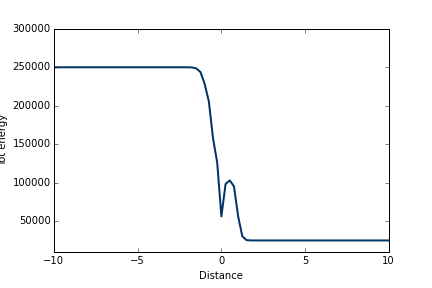
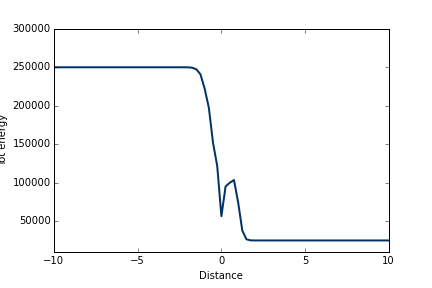
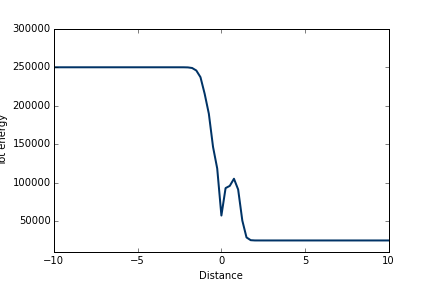
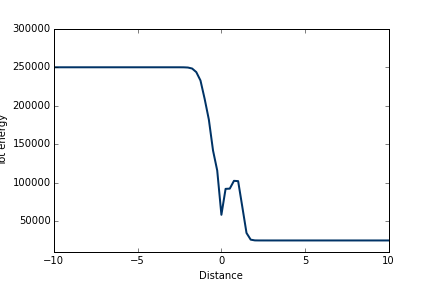
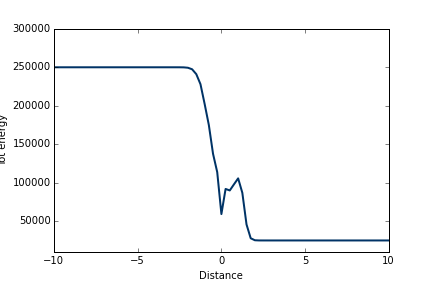
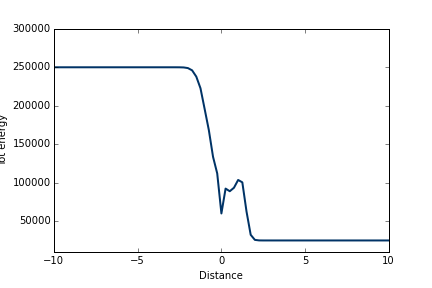
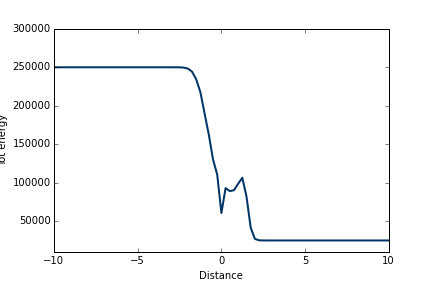
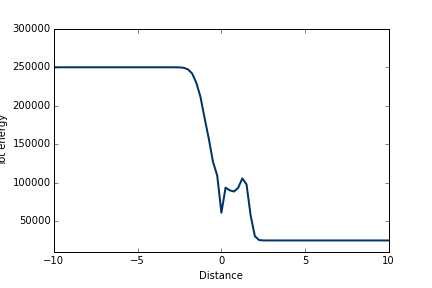
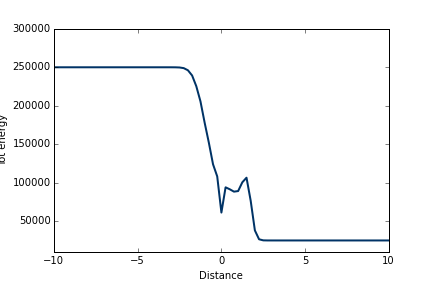
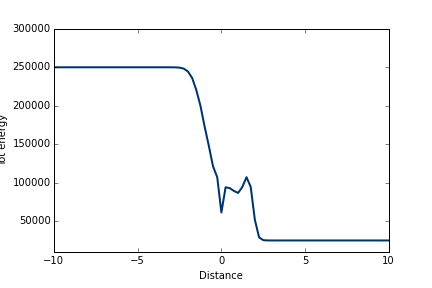
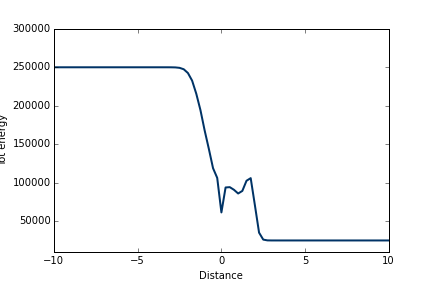
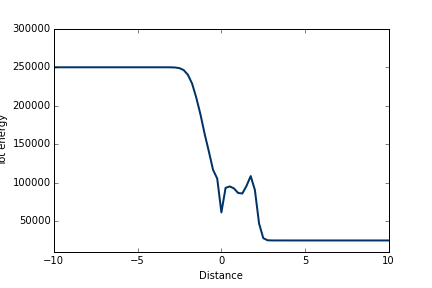
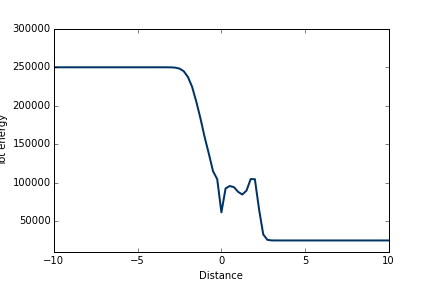
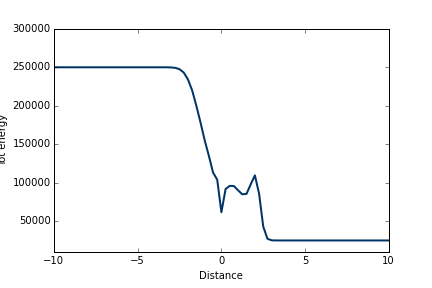
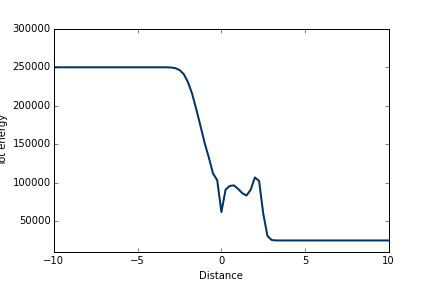
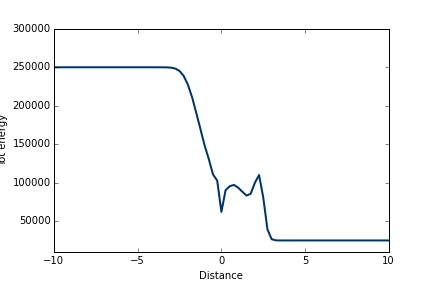
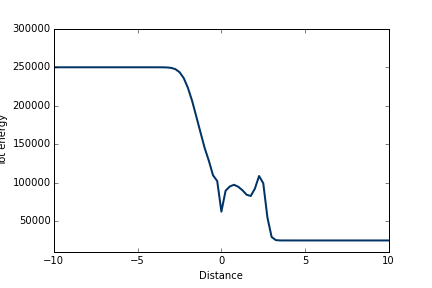
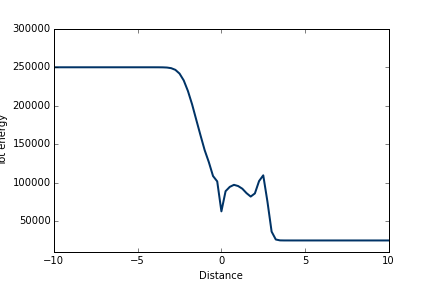
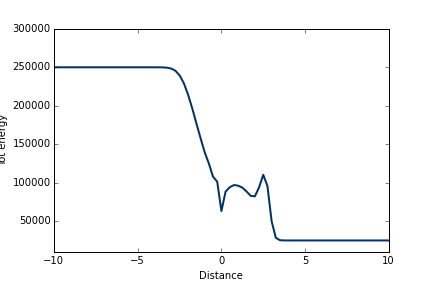
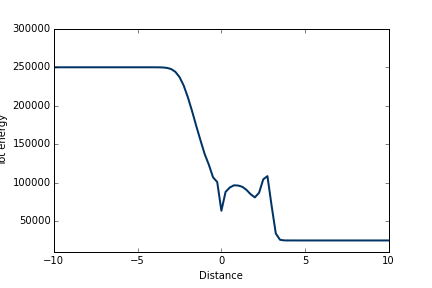
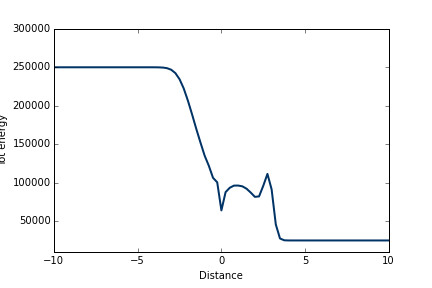
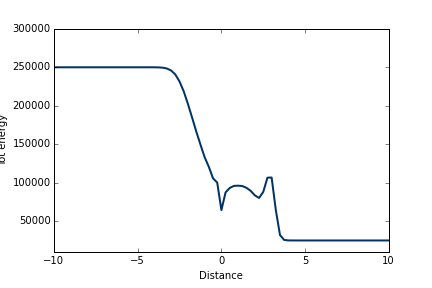
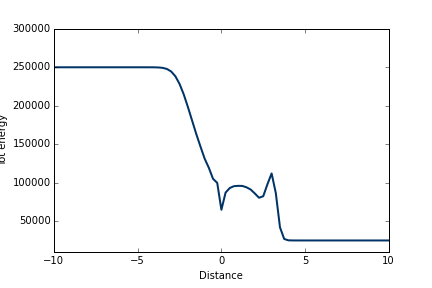
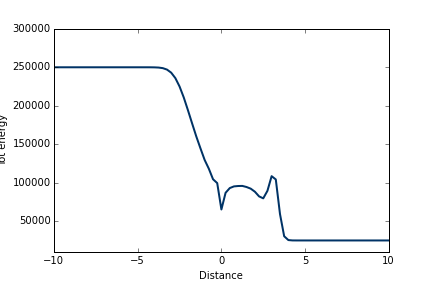
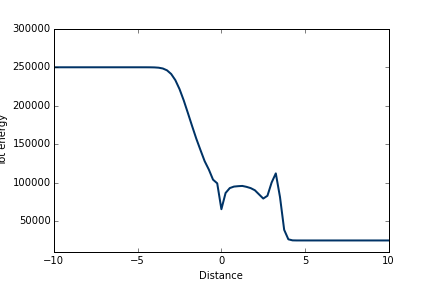
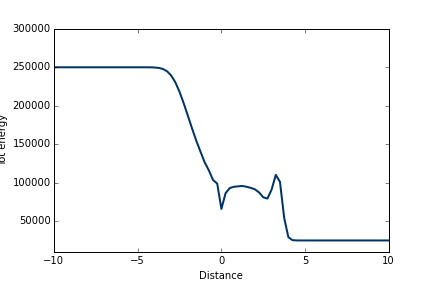
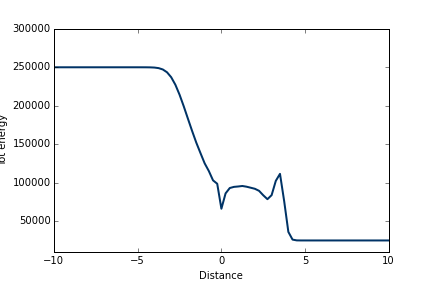
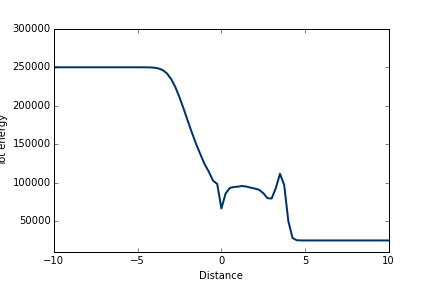
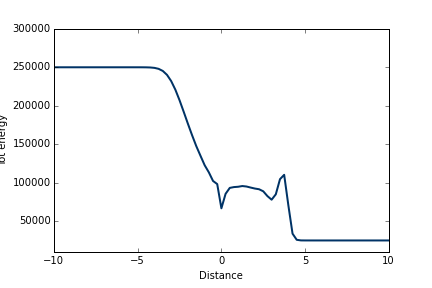
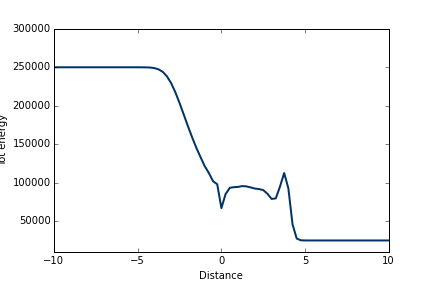
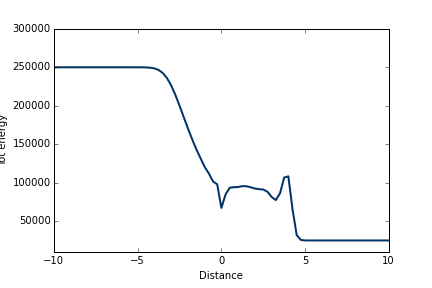
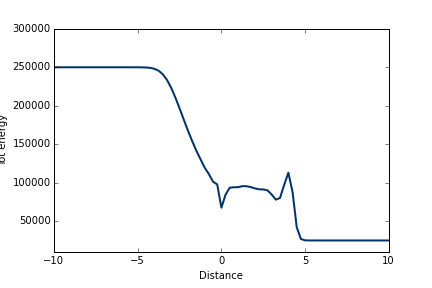
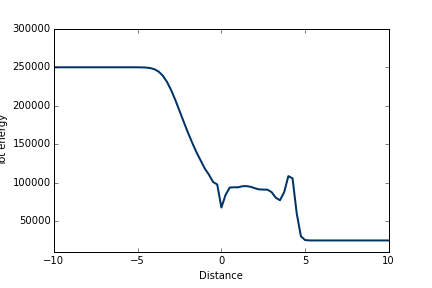
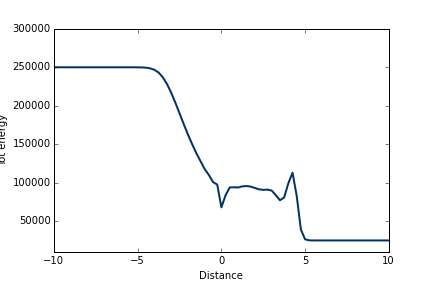
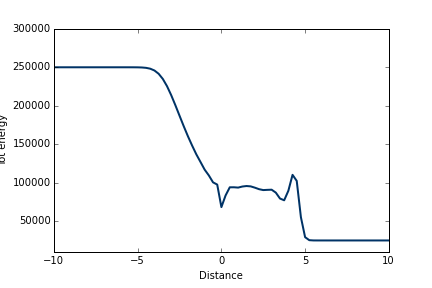
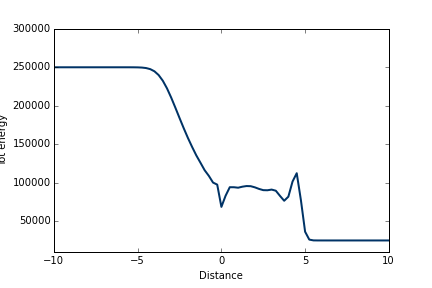
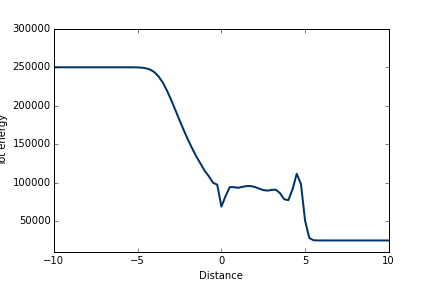
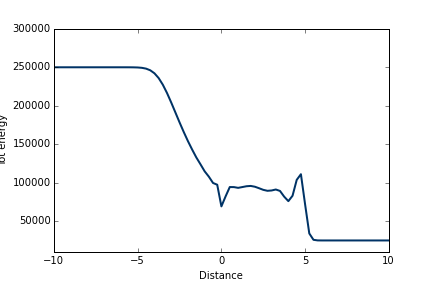
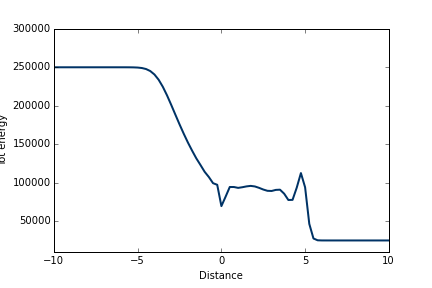
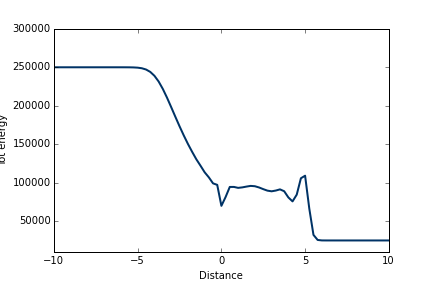
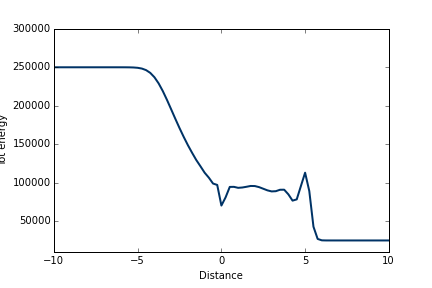

In [282]:
fig = plt.figure();
ax = plt.axes(xlim=(-10.,10.),ylim=(10000,300000),xlabel=('Distance'),ylabel=('Tot energy'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=rhoeplt, interval=50)
display_animation(anim, default_mode='once')